In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

## we will first check if the data file is Comma Seperated or Tab Seperated so that we can convert it to a normal DataFrame

In [2]:
message = [df.rstrip() for df in open('SMSSpamCollection')]
message[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

<b>seems like the data is tab seperated with type of message (ham/spam) and then the actual message</b>

In [3]:
messages = pd.read_csv('SMSSpamCollection', sep='\t', names=['type', 'text'])

In [4]:
messages.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


we will now create a new column with the word count of the text column.

In [5]:
messages['text length'] = messages['text'].apply(len)

In [6]:
messages.head()

,type,text,text length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# EDA

we will now create a histogram of the text length of the messages which will give us an idea as to the highest number of words per text

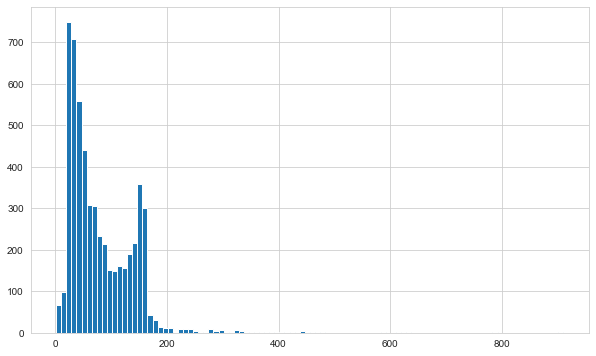

In [7]:
plt.figure(figsize=(10,6))
messages['text length'].hist(bins=100)

In [8]:
messages['text length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: text length, dtype: float64

The highest length of the message seems to be 910 words, lets see what that message is.

In [9]:
messages[messages['text length'] == 910].iloc[0][1]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

<b>seems to be some kind of a love letter.</b> <br>
Now lets try to visualise the word count based on the type of message.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FDA1D6C320>,
      dtype=object)

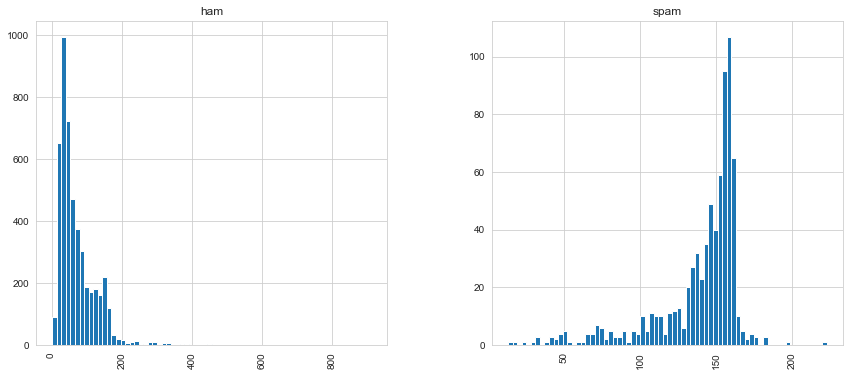

In [19]:
messages['text length'].hist(messages['type'], bins=70, figsize=(14,6))

<b>It can be clearly seen that the Spam messages contain noticably more word count compared to the Non-Spam text.</b>

## Now lets first create a bag of words by removing the Puntuation and also the stopwords from the text messages to create a sparce matrix

In [20]:
messages.head()

,type,text,text length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


We shall now import pythons built in library called string (Which will remove all the punctuations) and also stop words from the NLTK corpus for text processing (to remove words like 'and', 'the'...). To create

In [30]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [57]:
from nltk.corpus import stopwords
#stopwords.words('english')

We will create a function to filter out the Punctuations and also the stopwords that can be applied to the messages column to create a bag of words as tokens using vectorization using CountVectorizer method

In [62]:
def text_process(mess):
    #First we will remove the punctuation from the messages
    #Then we will remove the stopwords
    #Return a list of clean words for further processing
    nopunc = [char for char in mess if char not in string.punctuation]
    #now we will join the individual letters in the list created from the above method
    nopunc = ''.join(nopunc)
    #now we will remove any stop words and return it within the data frame this function is applied to
    return [word for word in nopunc.split() if word.lower not in stopwords.words('english')]

Lets try to apply this function to the head of the messages column to check the function.

In [67]:
trail = messages['text'].head().apply(text_process)

In [71]:
trail

0    [Go, until, jurong, point, crazy, Available, o...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, in, 2, a, wkly, comp, to, win, F...
3    [U, dun, say, so, early, hor, U, c, already, t...
4    [Nah, I, dont, think, he, goes, to, usf, he, l...
Name: text, dtype: object

<b> Seems to work fine </b>

In [72]:
messages.head()

,type,text,text length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Now for Vectorization and then we will create a pipeline with CountVectorizer (For Bag of words) then transform the same with TfIDF and then fit it into a Model after creating the Train Test Split which will help evaluate the model.

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
mess_train, mess_test, type_train, type_test = train_test_split(messages['text'], messages['type'], test_size=0.2)

In [82]:
#pipeline to transform the data
#we will Import the required libraries for this pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#We will use naive bayes for prediction
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

## We will now create a pipeline with all the required Pre-Processing and also the Prediction model.

In [87]:
spam_detection_pipeline = Pipeline([
    ('bow :', CountVectorizer(analyzer=text_process)),
    ('tfitf :', TfidfTransformer()),
    ('classifier :', MultinomialNB())])

In [88]:
spam_detection_pipeline.fit(mess_train, type_train)

Pipeline(memory=None,
         steps=[('bow :',
                 CountVectorizer(analyzer=<function text_process at 0x000001FDAFB58EA0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfitf :',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier :',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [89]:
predictions = spam_detection_pipeline.predict(mess_test)

## Model Evaluation

In [90]:
from sklearn.metrics import classification_report

In [91]:
print(classification_report(type_test, predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       960
        spam       1.00      0.66      0.80       155

    accuracy                           0.95      1115
   macro avg       0.97      0.83      0.89      1115
weighted avg       0.96      0.95      0.95      1115



We have a pretty good accuracy score off the model and we can use this pipeline to Fit and Predict spam messages. But there are still some considerations we can make in order to make our model more efficient!! <br> Will work more on Text Processing to find a way to check for some abbrevations and shorthands which are hard to check.